# Where's Wallabies, Animal Detection
## Final project by Troy Wilson & Daniel Barajas Torres

### Pipeline
-  Give folder of all images to MegaDetector in batch mode, resulting in JSON file
-  Crop images using the information from JSON file
-  Break cropped images into Test and Train sets
-  Preprocess for Resnet50
-  Feed to Resnet50 K-fold model
-  Evaluate performance

# In order for the Megadetector to work the pythonpath must be set
## Windows:
set PYTHONPATH=%PYTHONPATH%; {cameratraps}; {ai4eutils}; {yolov5}

## Mac/Linux:
export PYTHONPATH="{cameratraps}:{ai4eutils}:{yolov5}"

### Necessary packages to install
- !pip3 install scikit-learn scipy matplotlib
- !pip3 install scikit-image
- !pip3 install tensorflow
- !pip3 install tqdm

## Imports

In [23]:
import numpy as np
import skimage
from skimage import io, img_as_float
from skimage.transform import resize
import matplotlib.pyplot as plt
import os.path as osp
from glob import glob
from random import shuffle
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SpatialDropout2D
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import math
from tensorflow.keras.applications import ResNet50, Xception, vgg19
from tensorflow.keras import Input, layers
from tensorflow.keras.applications.resnet50 import preprocess_input
from skimage import color
from PIL import Image, ImageFilter, ImageOps
import math
import json
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Dropout, RandomRotation, RandomZoom, RandomFlip
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tqdm import tqdm
import random
import os
import shutil

In [24]:
categories = ['bird', 'bobcat', 'coyote', 'deer', 'dog', 'fox', 'mountainlion',
              'mouse', 'possum',  'rabbit', 'raccoon',  'skunk', 'squirrel']

In [25]:
#constant paths
ALL_IMAGES_IN = 'all_images'
ALL_IMAGES_OUT = 'all_images_detection.json'
ALL_IMAGES_CROPPED = 'all_cropped_images'

In [26]:
def moveFile(source, destination):
    shutil.copy(source, destination)

## Run Detection

In [5]:
if not os.path.exists(ALL_IMAGES_OUT):
    !python git/cameratraps/detection/run_detector_batch.py "md_v5a.0.0.pt" $ALL_IMAGES_IN $ALL_IMAGES_OUT --output_relative_filenames --recursive --checkpoint_frequency 10000

114943 image files found in the input directory
The checkpoint file will be written to checkpoint_20221211235538.json
PyTorch reports 1 available CUDA devices
GPU available: True
Using PyTorch version 1.10.1
Sending model to GPU
Loaded model in 18.94 seconds
Loaded model in 18.94 seconds
Processing image all_images\bird\5858bf32-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\bird\5858bf39-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\bird\5858bf3c-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\bird\5858bf4f-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\bird\5858bf88-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\bird\5858bf91-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\bird\5858bfd4-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\bird\5858bfdf-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\bird\5858c005-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\bird\5858c00a-23d

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)


 83%|########2 | 95087/114943 [5:59:45<1:11:18,  4.64it/s]


 83%|########2 | 95088/114943 [5:59:46<1:11:05,  4.66it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Processing image all_images\rabbit\5921651c-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\59216529-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\59216531-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\5921655a-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\5921656f-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\5921657b-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\59216580-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\59216583-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\59216584-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\592165e0-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\59216606-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\5921663b-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\59216650-23d2-11e8-a6a3-ec086b02610b.jpg
Processing i

Processing image all_images\rabbit\59830847-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\5983087a-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\59830893-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\59830896-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\5983089e-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\598308af-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\598308ca-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\598308d2-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\598308de-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\598308e2-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\59830906-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\5983090c-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\rabbit\59830966-23d2-11e8-a6a3-ec086b02610b.jpg
Processing i

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Processing image all_images\raccoon\59d5b581-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\raccoon\59d5b59b-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\raccoon\59d5b5a2-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\raccoon\59d5b5af-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\raccoon\59d5b5b1-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\raccoon\59d5b5b3-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\raccoon\59d5b5bb-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\raccoon\59d5b5ec-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\raccoon\59d5b60e-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\raccoon\59d5b61c-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\raccoon\59d5b625-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\raccoon\59d5b643-23d2-11e8-a6a3-ec086b02610b.jpg
Processing image all_images\raccoon\59d5b658-23d2-11e8-a6a3-ec086b02610b.jp

## Load JSON from MegaDetector


In [6]:
f = open(ALL_IMAGES_OUT)
data = json.load(f)
all_images = data['images']

## Crop Images to their bounding boxes

In [7]:
def setupCroppedFolder(rootFolder):
    if not os.path.exists(rootFolder):
        os.mkdir(rootFolder)
        
    for cat in tqdm(categories):
        if not os.path.exists(f'{rootFolder}/{cat}'):
            os.mkdir(f'{rootFolder}/{cat}')

if not os.path.exists(ALL_IMAGES_CROPPED):
    setupCroppedFolder(ALL_IMAGES_CROPPED)

100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 164.23it/s]


In [8]:
def cropImages(images, inPath, rootFolder):
    for imageJSON in tqdm(images):
        imagePath = inPath + '\\' + imageJSON['file']
        image = plt.imread(imagePath)
        
        for detection in imageJSON["detections"]:
            if detection['conf'] <= 0.80: #skip low confidence values
                continue
            bbox = detection['bbox']
            min_x_pixel = math.floor(bbox[0]*image.shape[1])
            min_y_pixel = math.floor(bbox[1]*image.shape[0])
            box_width = math.floor(bbox[2]*image.shape[1])
            box_height = math.floor(bbox[3]*image.shape[0])
            
            imageCrop = image[ min_y_pixel: (min_y_pixel+box_height), min_x_pixel:(min_x_pixel  + box_width)]
            im = Image.fromarray(imageCrop)
            replaceSlashes = imageJSON['file'].replace('\\','/')
            im.save(f"{rootFolder}/{replaceSlashes}_cropped.jpg")
    
cropImages(all_images, ALL_IMAGES_IN, ALL_IMAGES_CROPPED)

-------Starting image processing-------


100%|████████████████████████████████████████████████████████████████████████| 114943/114943 [2:11:15<00:00, 14.59it/s]

-------Images done processing-------


## Setup training and testing sets 

In [9]:
def setupTrainTestFolders():
    if not os.path.exists('./data'):
        os.mkdir('./data')
    
    if not os.path.exists('./data/train'):
        os.mkdir('./data/train')

    if not os.path.exists('./data/test'):
        os.mkdir('./data/test')
    
    for cat in categories:
        if not os.path.exists(f'./data/train/{cat}'):
            os.mkdir(f'./data/train/{cat}')
            
    for cat in categories:
        if not os.path.exists(f'./data/test/{cat}'):
            os.mkdir(f'./data/test/{cat}')

def buildTestTrain(directory):
    setupTrainTestFolders()
    
    for cat in tqdm(categories):
        files=os.listdir(f'{directory}/{cat}')
        files = np.array(files)
        files = np.random.choice(files, len(files), replace=False)        
        eightyP = math.floor(len(files)*.8)
        train = files[:eightyP]
        test = files[eightyP:]
        #setup train
        for tr in train:
            moveFile(f'{directory}/{cat}/{tr}', f'./data/train/{cat}/{tr}')
            if len(os.listdir(f'data/train/{cat}')) > 3000:
                break
        #setup test
        for tr in test:
            moveFile(f'{directory}/{cat}/{tr}', f'./data/test/{cat}/{tr}')            
            if len(os.listdir(f'data/test/{cat}')) > 50:
                break

            
buildTestTrain('./all_cropped_images')

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [12:55<00:00, 59.65s/it]


In [ ]:
#!!!!!This cell should be skipped for the current iteration of the model!!!!!

def getColorChannelsBlurandUnshape(im, output_directory, cat, d, i, tag):
    r,g,b = im.split()
    r=r.convert("RGB")
    g=g.convert("RGB")
    b=b.convert("RGB")
    
    r.save(f'{output_directory}/{cat}/{i}_{tag}_red.jpg', quality=95)
    g.save(f'{output_directory}/{cat}/{i}_{tag}_green.jpg', quality=95)
    b.save(f'{output_directory}/{cat}/{i}_{tag}_blue.jpg', quality=95)
    
    im_blur=im.filter(ImageFilter.GaussianBlur)
    im_blur.save(f'{output_directory}/{cat}/{i}_{tag}_blurry.jpg', quality=95)
    
    im_unsharp=im.filter(ImageFilter.UnsharpMask)
    im_unsharp.save(f'{output_directory}/{cat}/{i}_{tag}_unsharp.jpg', quality=95)
        
    for j in range(10):
        im_rot = im.rotate(j)
        im_rot.save(f'{output_directory}/{cat}/{i}_{tag}_rot{j}.jpg', quality=95)
    
        im_rotneg = im.rotate(-j)
        im_rotneg.save(f'{output_directory}/{cat}/{i}_{tag}_rotneg{j}.jpg', quality=95)

def augmentImage(imagePath, output_directory, cat, d, i):
    im=Image.open(imagePath)
    mirror_image = ImageOps.mirror(im)
    mirror_image.save(f'{output_directory}/{cat}/mirror{i}_{d}', quality=95)
    getColorChannelsBlurandUnshape(im, output_directory, cat, d, i, 'original')
    getColorChannelsBlurandUnshape(mirror_image, output_directory, cat, d, i, 'mirror')
        
for cat in tqdm(categories):
    currentLength = len(os.listdir(f'data/train/{cat}'))
    uniqueFiles = os.listdir(f'data/train/{cat}')
    while currentLength < 2000:
        d=random.choice(uniqueFiles)
        totalPath = f'data/train/{cat}/{d}'
        augmentImage(totalPath, f'data/train', cat, d, currentLength)
        currentLength = len(os.listdir(f'data/train/{cat}'))


## Load Data

In [27]:
#load Images
def load_image_color(path, output_shape): 
    img = io.imread(path)
    image_resized = resize(img, output_shape, anti_aliasing=True)
    return image_resized

In [28]:
def get_color_image_arrays(data_path, categories, output_shape, fmt='jpg'):
    if(output_shape != (64,64,3)):
        print('Output Shape incorrect')
        return [],[],[],[]
    
    train_image_paths = []
    test_image_paths = []
    train_labels = []
    test_labels = []
    
    for i, cat in enumerate(categories):
        #train
        pth = osp.join(data_path, 'train', cat, '*.{:s}'.format(fmt))
        pth = glob(pth)
        
        train_image_paths.extend(pth)
        train_labels.extend([i]*len(pth))
        
        #test
        pth = osp.join(data_path, 'test', cat, '*.{:s}'.format(fmt))
        pth = glob(pth)
        
        test_image_paths.extend(pth)
        test_labels.extend([i]*len(pth))
        
    train_image_arrays = [load_image_color(p, output_shape) for p in tqdm(train_image_paths)]
    test_image_arrays = [load_image_color(p, output_shape) for p in tqdm(test_image_paths)]
    
    train_image_arrays = (255 * np.array(train_image_arrays)).astype(np.uint8)
    test_image_arrays = (255 * np.array(test_image_arrays)).astype(np.uint8)
    
    train_labels = np.array(train_labels)
    test_labels = np.array(test_labels)
    return train_image_arrays, test_image_arrays, train_labels, test_labels

In [29]:
data_path = './data'

if not os.path.exists('saved_vars'):
    print('No predefined variables found')
    train_image_arrays, test_image_arrays, train_labels, test_labels = get_color_image_arrays(data_path, categories, (64,64,3))
    os.mkdir('saved_vars')
    np.save('saved_vars/saved_train_array.npy', train_image_arrays)
    np.save('saved_vars/saved_test_array.npy', test_image_arrays)
    np.save('saved_vars/saved_train_labels.npy', train_labels)
    np.save('saved_vars/saved_test_labels.npy', test_labels)
else:
    print('loading predefined variables')
    train_image_arrays = np.load('saved_vars/saved_train_array.npy')
    test_image_arrays = np.load('saved_vars/saved_test_array.npy')
    train_labels = np.load('saved_vars/saved_train_labels.npy')
    test_labels = np.load('saved_vars/saved_test_labels.npy')

print(train_image_arrays.shape)
print(train_labels.shape)
print(test_image_arrays.shape)
print(test_labels.shape)

loading predefined variables
(31278, 64, 64, 3)
(31278,)
(639, 64, 64, 3)
(639,)


## Load and Preprocessing for Resnet

In [30]:
#Load Resnet
RESNET = ResNet50(weights='imagenet', include_top=False, pooling='avg')
RESNET.summary()
train_image_resnet = preprocess_input(train_image_arrays)
test_image_resnet = preprocess_input(test_image_arrays)

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_3[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

                                                                                                  
 conv2_block2_add (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, None, None,   0           ['conv2_block2_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, None, None,   16448       ['conv2_block2_out[0][0]']       
                                64)                                                               
                                                                                                  
 conv2_blo

                                128)                                                              
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_2_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, None, None,   0          ['conv3_block2_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block2_2_relu[0][0]']    
                                512)                                                              
          

 conv4_block1_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, None, None,   0          ['conv4_block1_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block1_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_2_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block3_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block3_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block3_add (Add)         (None, None, None,   0           ['conv4_block2_out[0][0]',       
                                1024)                             'conv4_block3_3_bn[0][0]']      
                                                                                                  
 conv4_block3_out (Activation)  (None, None, None,   0           ['conv4_block3_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_blo

 ization)                       256)                                                              
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, None, None,   0          ['conv4_block6_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block6_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block6_3_conv[0][0]']    
 ization)                       1024)                                                             
          

 conv5_block3_1_conv (Conv2D)   (None, None, None,   1049088     ['conv5_block2_out[0][0]']       
                                512)                                                              
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, None, None,   2048       ['conv5_block3_1_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, None, None,   0          ['conv5_block3_1_bn[0][0]']      
 n)                             512)                                                              
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, None, None,   2359808     ['conv5_block3_1_relu[0][0]']    
          

MemoryError: Unable to allocate 1.43 GiB for an array with shape (31278, 64, 64, 3) and data type float32

## Some helper functions

In [31]:
def get_test_accuracy(model, x_test, y_test):
    """Test model classification accuracy"""
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))
    return test_acc

In [32]:
#Define functions to plot accuracy and loss
def plotAccuracy(history):

    try:
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
    except KeyError:
        plt.plot(history.history['acc'])
        plt.plot(history.history['val_acc'])
    plt.title('Accuracy vs. epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show() 
    
def plotLoss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss vs. epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show() 

In [33]:
from sklearn import metrics
def confMat(model, x_test, y_test):
    plt.figure(figsize=(15, 5))

    #Predict test images
    predict_x = model.predict(x_test)
    #Get corresponding predicted label
    y_pred=np.argmax(predict_x,axis=1)

    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, index=categories, columns=categories)

    plt.title("Confusion matrix\n")
    sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
    plt.ylabel("Predicted")
    plt.xlabel("Actual")
    plt.show()
    
    #trying this out
    print(metrics.classification_report(y_test, y_pred, digits=3, zero_division=0))
    return metrics.classification_report(y_test, y_pred, digits=3, output_dict=True, zero_division=0)

## Standard Sequential Model
### Inactive but kept in the notebook as it is still a valid option, simply less effective than k-fold

In [ ]:
model = Sequential([
                RESNET,
                Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                tf.keras.layers.BatchNormalization(epsilon=0.1),            
                Dropout(0.1),
                Dense(50, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                tf.keras.layers.BatchNormalization(epsilon=0.1),            
                Dropout(0.05),
                Dense(len(categories), activation='softmax'),
    ])
model.compile(
      optimizer = tf.keras.optimizers.Adam(learning_rate=0.00008),
      loss='sparse_categorical_crossentropy',
      metrics = ['accuracy']
)

RESNET.layers[0].trainable = False
for layer in RESNET.layers[-50:]: #50
    layer.trainable = True
    
model.summary()

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience = 3, mode = 'max', verbose = 1)
checkpoint_best = ModelCheckpoint(filepath='./checkpoints/checkpoint',
                             save_weights_only=True,
                             save_freq='epoch',
                             monitor='val_accuracy',
                             save_best_only=True,
                             verbose = 1)
callbacks=[early_stopping, checkpoint_best]
new_history = model.fit(train_image_resnet, train_labels, epochs=50, callbacks=callbacks, validation_data=(test_image_resnet, test_labels))

In [ ]:
test_first = get_test_accuracy(model, test_image_resnet, test_labels)

In [ ]:
plotAccuracy(new_history)
plotLoss(new_history)

In [ ]:
confMat(model,test_image_arrays, test_labels)

# K-Fold Model Sequential ResNet50 Model


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
798/798 [==============================] - ETA: 0s - loss: 3.7419 - accuracy: 0.6287
Epoch 1: val_accuracy improved from -inf to 0.82863, saving model to ./checkpoints\checkpoint
798/798 [==============================] - 60s 66ms/step - loss: 3.7419 - accuracy: 0.6287 - val_loss: 2.7779 - val_accuracy: 0.8286
Epoch 2/50
798/798 [==============================] - ETA: 0s - loss: 2.3290 - accuracy: 0.8688
Epoch 2: val_accuracy improved from 0.82863 to 0.87782, saving model to ./checkpoints\checkpoint
798/798 [==============================] - 51s 63ms/step - loss: 2.3290 - accuracy: 0.8688 - val_loss: 2.0316 - val_accuracy: 0.8778
Epoch 3/50
798/798 [==============================] - ETA: 0s - loss: 1.5862 - accuracy: 0.9281
Epoch 3: val_accuracy improved from 0.87782 to 0.88377, saving model to ./checkpoints\checkpoint
798/798 [==============================] - 51s 64ms/step - lo

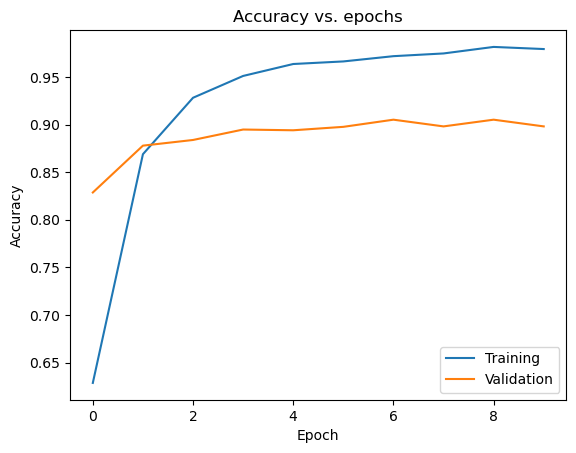

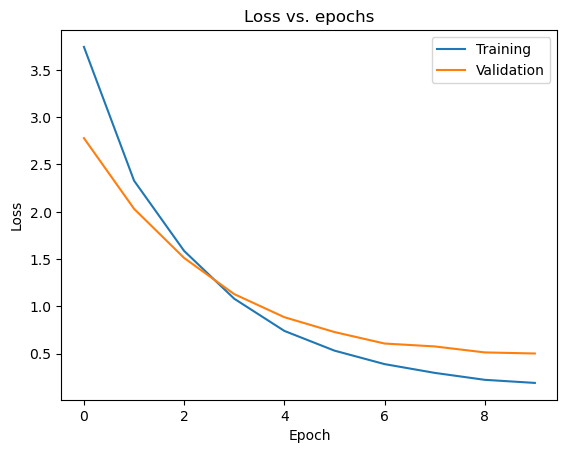

200/200 [==============================] - 3s 13ms/step


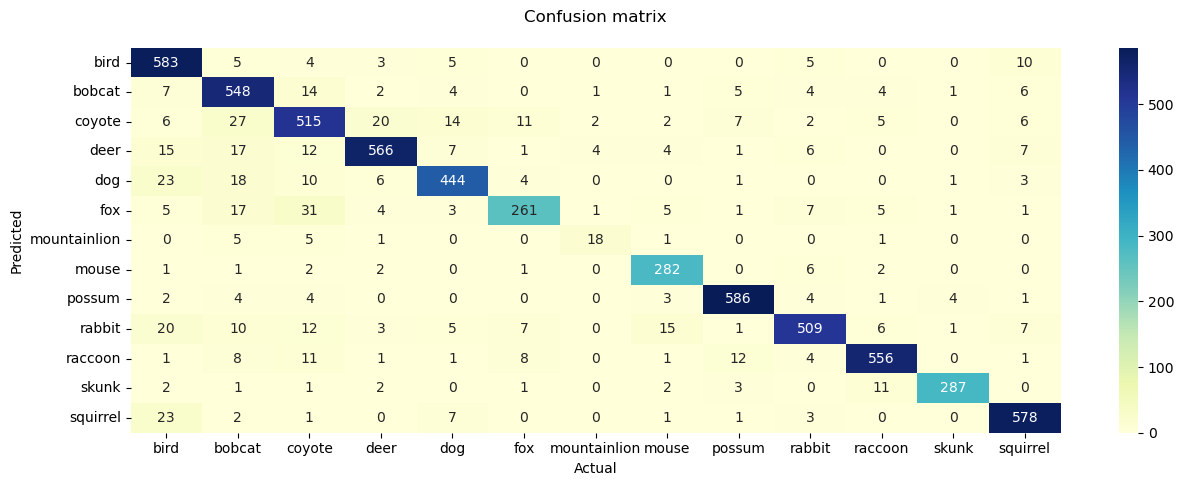

              precision    recall  f1-score   support

           0      0.847     0.948     0.895       615
           1      0.827     0.918     0.870       597
           2      0.828     0.835     0.831       617
           3      0.928     0.884     0.906       640
           4      0.906     0.871     0.888       510
           5      0.888     0.763     0.821       342
           6      0.692     0.581     0.632        31
           7      0.890     0.949     0.919       297
           8      0.948     0.962     0.955       609
           9      0.925     0.854     0.888       596
          10      0.941     0.921     0.931       604
          11      0.973     0.926     0.949       310
          12      0.932     0.938     0.935       616

    accuracy                          0.898      6384
   macro avg      0.887     0.873     0.878      6384
weighted avg      0.900     0.898     0.898      6384

f-score: 0.8783520792656275
---------------------------------------------------

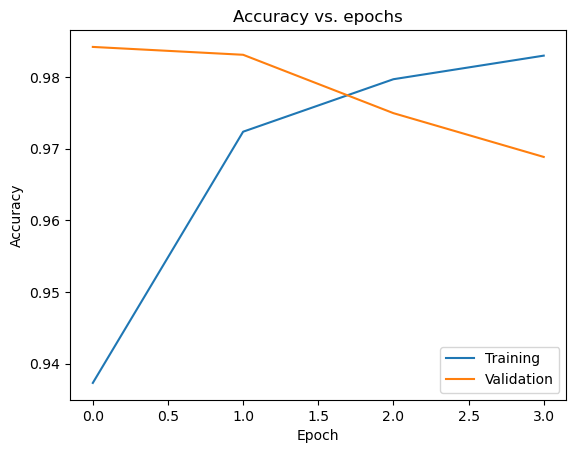

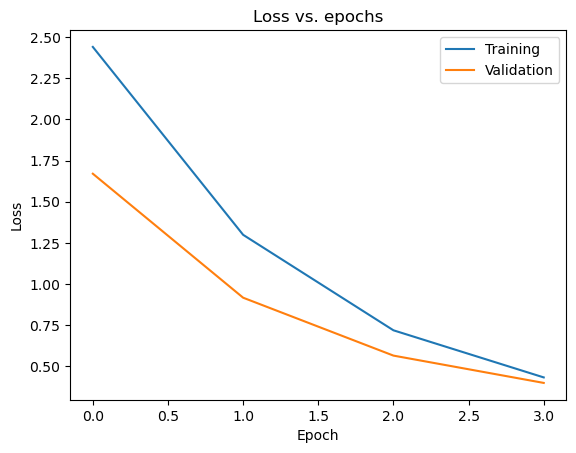

200/200 [==============================] - 5s 14ms/step


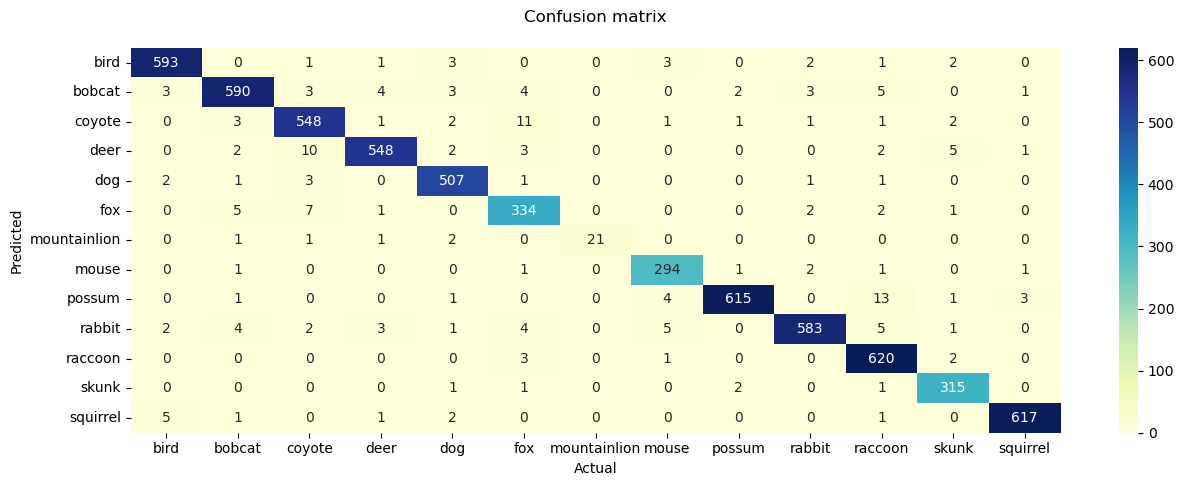

              precision    recall  f1-score   support

           0      0.980     0.979     0.979       606
           1      0.969     0.955     0.962       618
           2      0.953     0.960     0.956       571
           3      0.979     0.956     0.967       573
           4      0.968     0.983     0.975       516
           5      0.923     0.949     0.936       352
           6      1.000     0.808     0.894        26
           7      0.955     0.977     0.966       301
           8      0.990     0.964     0.977       638
           9      0.981     0.956     0.968       610
          10      0.949     0.990     0.970       626
          11      0.957     0.984     0.971       320
          12      0.990     0.984     0.987       627

    accuracy                          0.969      6384
   macro avg      0.969     0.957     0.962      6384
weighted avg      0.969     0.969     0.969      6384

f-score: 0.9621006853663899
---------------------------------------------------

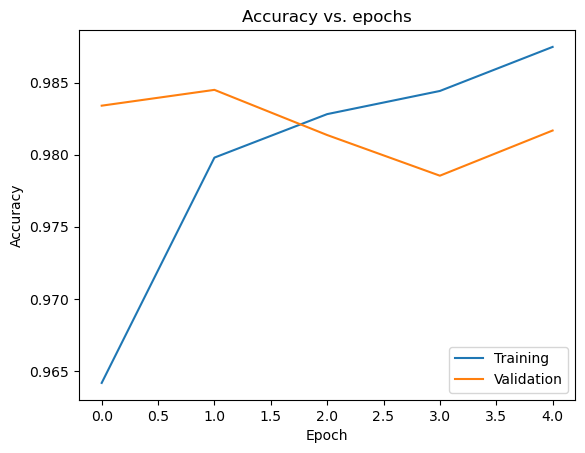

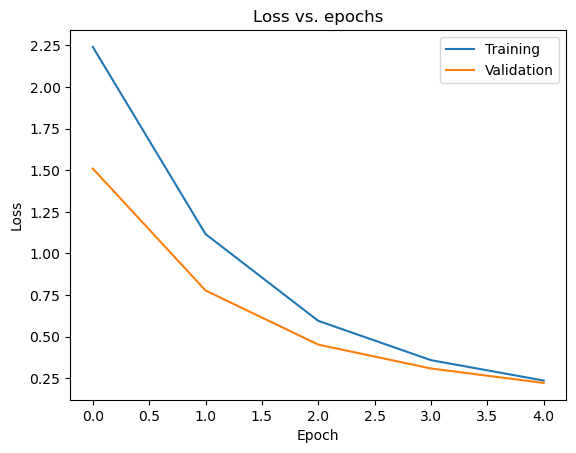

200/200 [==============================] - 5s 14ms/step


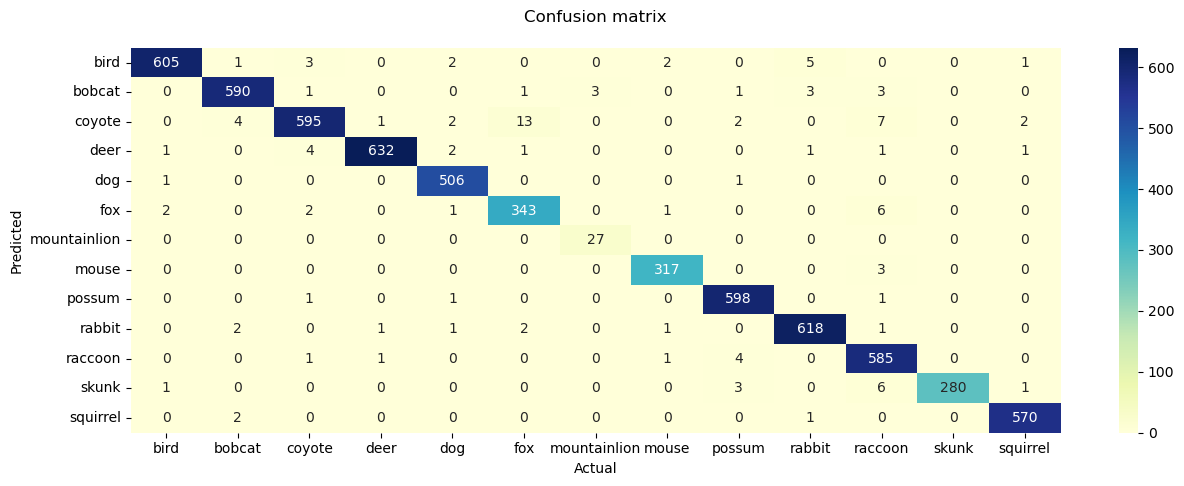

              precision    recall  f1-score   support

           0      0.992     0.977     0.985       619
           1      0.985     0.980     0.983       602
           2      0.980     0.950     0.965       626
           3      0.995     0.983     0.989       643
           4      0.983     0.996     0.989       508
           5      0.953     0.966     0.959       355
           6      0.900     1.000     0.947        27
           7      0.984     0.991     0.988       320
           8      0.982     0.995     0.988       601
           9      0.984     0.987     0.986       626
          10      0.954     0.988     0.971       592
          11      1.000     0.962     0.981       291
          12      0.991     0.995     0.993       573

    accuracy                          0.982      6383
   macro avg      0.976     0.982     0.979      6383
weighted avg      0.982     0.982     0.982      6383

f-score: 0.9787398558852323
---------------------------------------------------

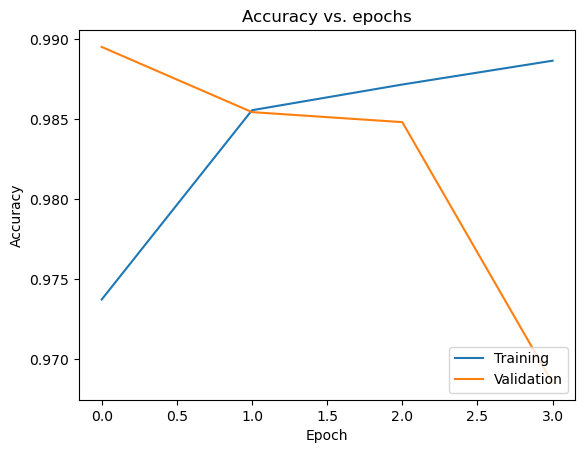

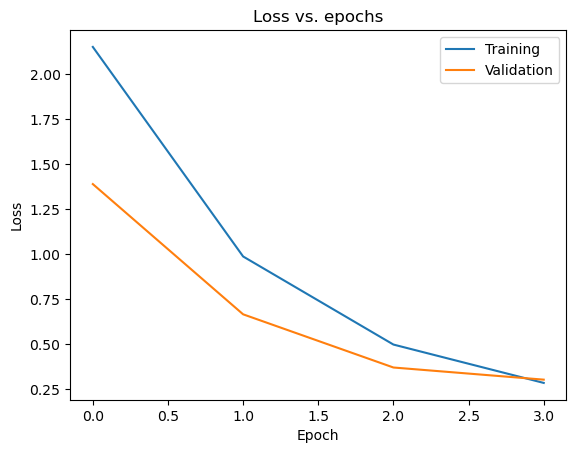

200/200 [==============================] - 3s 13ms/step


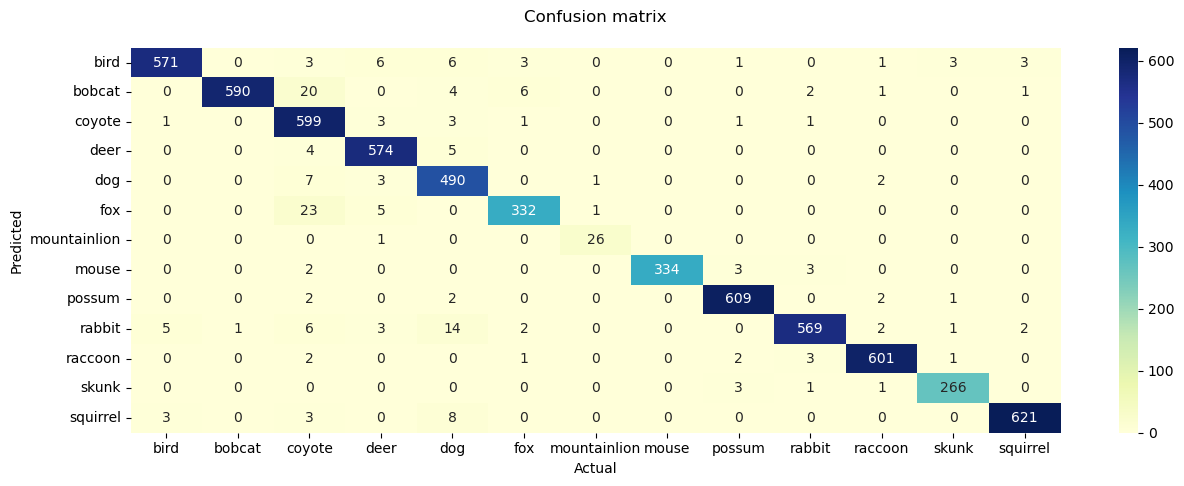

              precision    recall  f1-score   support

           0      0.984     0.956     0.970       597
           1      0.998     0.946     0.971       624
           2      0.893     0.984     0.936       609
           3      0.965     0.985     0.975       583
           4      0.921     0.974     0.947       503
           5      0.962     0.920     0.941       361
           6      0.929     0.963     0.945        27
           7      1.000     0.977     0.988       342
           8      0.984     0.989     0.986       616
           9      0.983     0.940     0.961       605
          10      0.985     0.985     0.985       610
          11      0.978     0.982     0.980       271
          12      0.990     0.978     0.984       635

    accuracy                          0.969      6383
   macro avg      0.967     0.967     0.967      6383
weighted avg      0.970     0.969     0.969      6383

f-score: 0.9668800868520108
---------------------------------------------------

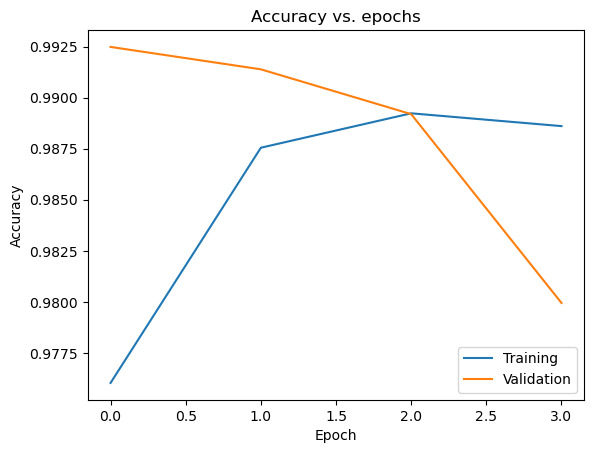

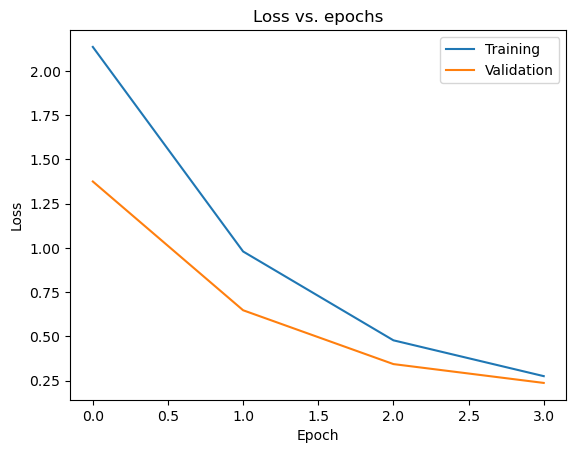

200/200 [==============================] - 3s 13ms/step


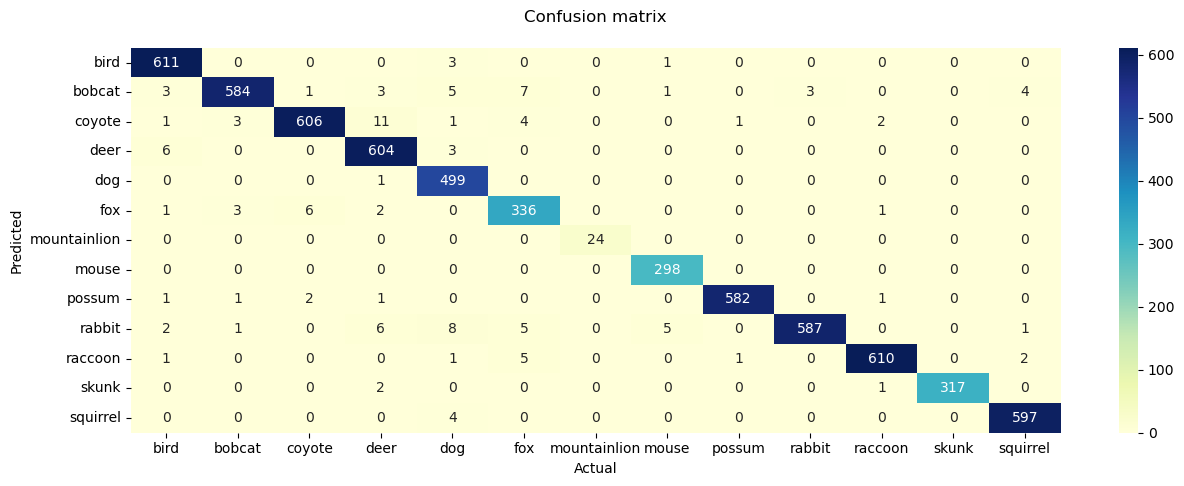

              precision    recall  f1-score   support

           0      0.976     0.993     0.985       615
           1      0.986     0.956     0.971       611
           2      0.985     0.963     0.974       629
           3      0.959     0.985     0.972       613
           4      0.952     0.998     0.975       500
           5      0.941     0.963     0.952       349
           6      1.000     1.000     1.000        24
           7      0.977     1.000     0.988       298
           8      0.997     0.990     0.993       588
           9      0.995     0.954     0.974       615
          10      0.992     0.984     0.988       620
          11      1.000     0.991     0.995       320
          12      0.988     0.993     0.991       601

    accuracy                          0.980      6383
   macro avg      0.981     0.982     0.981      6383
weighted avg      0.980     0.980     0.980      6383

f-score: 0.9813862118872557
---------------------------------------------------

In [34]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np

early_stopping = EarlyStopping(monitor='val_accuracy', patience = 3, mode = 'max', verbose = 1)
checkpoint_best = ModelCheckpoint(filepath='./checkpoints/checkpoint',
                             save_weights_only=True,
                             save_freq='epoch',
                             monitor='val_accuracy',
                             save_best_only=True,
                             verbose = 1)
callbacks=[early_stopping, checkpoint_best]

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
fscore_per_fold = []

inputs = np.concatenate((train_image_resnet, test_image_resnet), axis=0)
targets = np.concatenate((train_labels, test_labels), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
    model = Sequential([
                RESNET,
                Dense(100, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01)),
                tf.keras.layers.BatchNormalization(epsilon=0.1),
                Dropout(0.01),
                Dense(50, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01)),
                tf.keras.layers.BatchNormalization(epsilon=0.1),            
                Dropout(0.01),
                Dense(21, activation='softmax'),
    ])
    model.compile(
          optimizer = tf.keras.optimizers.Adam(learning_rate=0.00008),
          loss='sparse_categorical_crossentropy',
          metrics = ['accuracy']
    )

    RESNET.layers[0].trainable = False
    for layer in RESNET.layers[-50:]: #50
        layer.trainable = True
    
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    # Fit data to model
    history = model.fit(inputs[train], targets[train], epochs=50, verbose=1, callbacks=callbacks,validation_data=(inputs[test], targets[test]))
    
    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    
    
    print(history.history['val_accuracy'])
    test_first = get_test_accuracy(model, inputs[test], targets[test])
    
    plotAccuracy(history)
    plotLoss(history)
    info = confMat(model,inputs[test], targets[test])
    
    print(f'f-score: {info["macro avg"]["f1-score"]}')
    fscore_per_fold.append(info['macro avg']['f1-score'])
    
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    # Increase fold number
    fold_no = fold_no + 1
    
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> f-score: {np.mean(fscore_per_fold)}')
print('------------------------------------------------------------------------')